In [1]:
from plantuml import PlantUML  # using 9 Mar, 2023 server version
import numpy as np
import imageio
import matplotlib.pyplot as plt
import yaml
import os
import carreno.viz.vol as viz

In [2]:
# show bigger figures by default
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 150

# create a server object to call for your computations
png_server = PlantUML(url='http://www.plantuml.com/plantuml/img/',
                      basic_auth={},
                      form_auth={}, http_opts={}, request_opts={})
svg_server = PlantUML(url='http://www.plantuml.com/plantuml/svg/',
                      basic_auth={},
                      form_auth={}, http_opts={}, request_opts={})

# output location
output_folder = ""
path_to_config = ".."
with open(os.path.join(path_to_config, 'config.yml'), 'r') as file:
    infos = yaml.safe_load(file)
    output_folder = os.path.join(path_to_config, infos['DIR']['graph'])

if not os.path.exists(output_folder):
   os.makedirs(output_folder)
   
print("Output folder :", output_folder)

def render_graph(content):
    img = imageio.imread(png_server.processes(content))
    plt.imshow(img)
    plt.show()

def save_svg_graph(path, content):
    # sadly, doesn't seem to work well with thesis format
    svg = str(svg_server.processes(content), 'UTF-8')
    svg_path = path + ".svg"
    with open(svg_path, "w") as svg_file:
        svg_file.write(svg)
        print("Saved graph at", svg_path)

def save_png_graph(path, content):
    img = imageio.imread(png_server.processes(content))
    png_path = path + ".png"
    imageio.imwrite(png_path, img)
    print("Saved graph at", png_path)

Output folder : ..\data/output/graph


# Model optimization
Graph for parameter sweeps

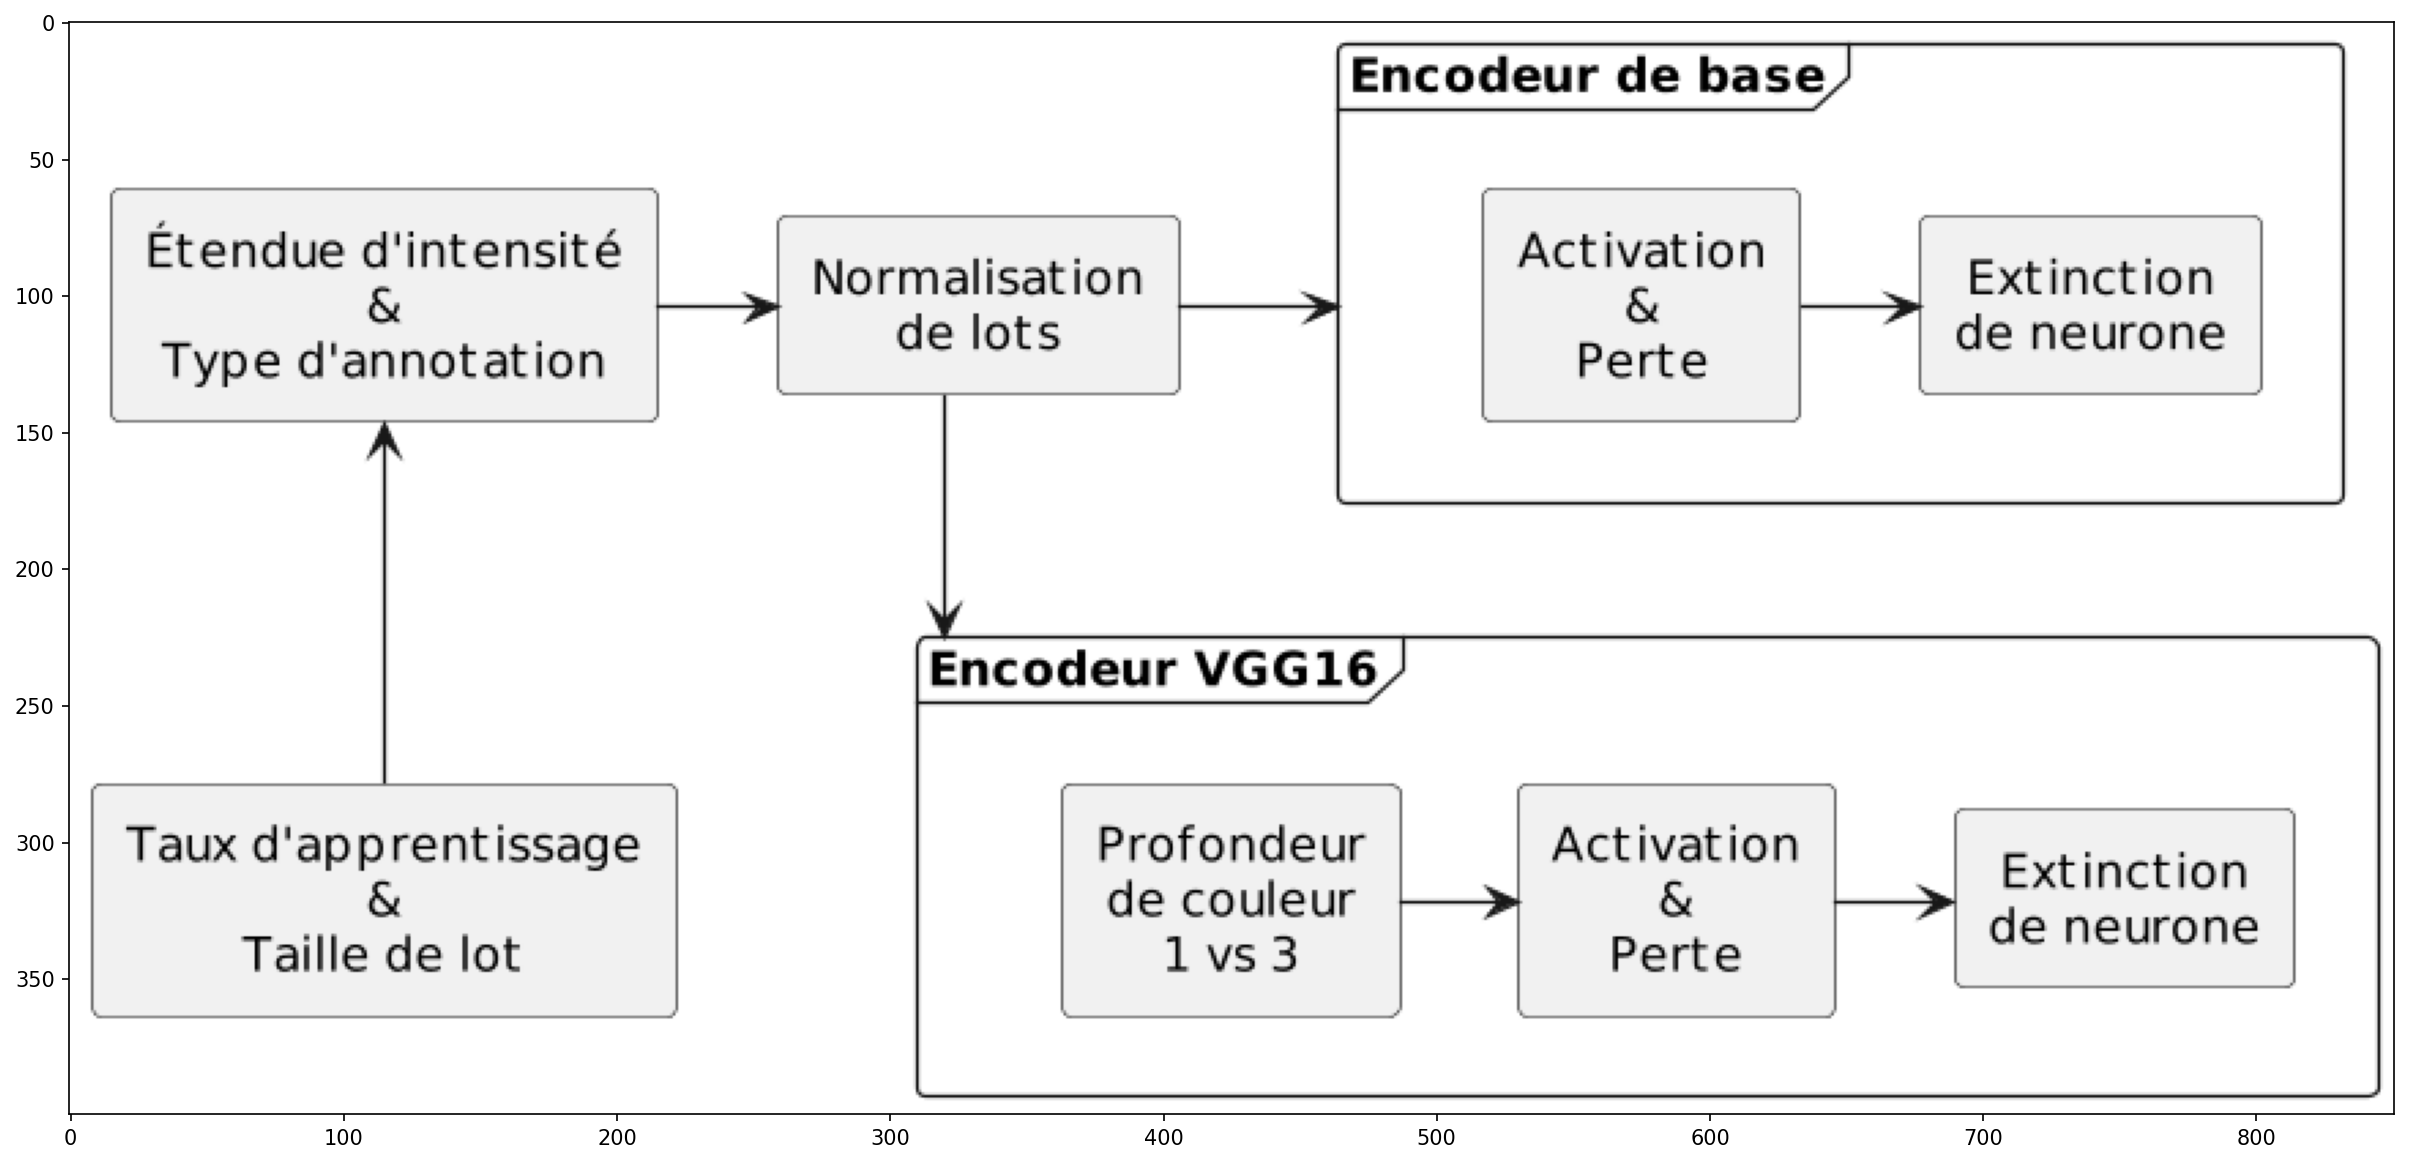

Saved graph at ..\data/output/graph\optimization.png
Saved graph at ..\data/output/graph\optimization.svg


In [3]:
# Sweep order
filename = os.path.join(output_folder, "optimization")
content = """
@startuml
scale 1024 width
scale 400 height

' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
rectangle "Taux d'apprentissage\\n&\\nTaille de lot" as lr
rectangle "Étendue d'intensité\\n&\\nType d'annotation" as scaler
rectangle "Normalisation\\nde lots" as norm
frame "Encodeur de base" as base {
    rectangle "Activation\\n&\\nPerte" as act1
    rectangle "Extinction\\nde neurone" as drop1
}
frame "Encodeur VGG16" as vgg16 {
    rectangle "Profondeur\\nde couleur\\n1 vs 3" as color
    rectangle "Activation\\n&\\nPerte" as act2
    rectangle "Extinction\\nde neurone" as drop2
}

' links
lr -u-> scaler
scaler -r-> norm
norm -r-> base
act1 -r-> drop1

norm -d-> vgg16
color -r-> act2
act2 -r-> drop2

drop1 -d[hidden]-> drop2

@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)

# UNet
Graphs for UNet visualization

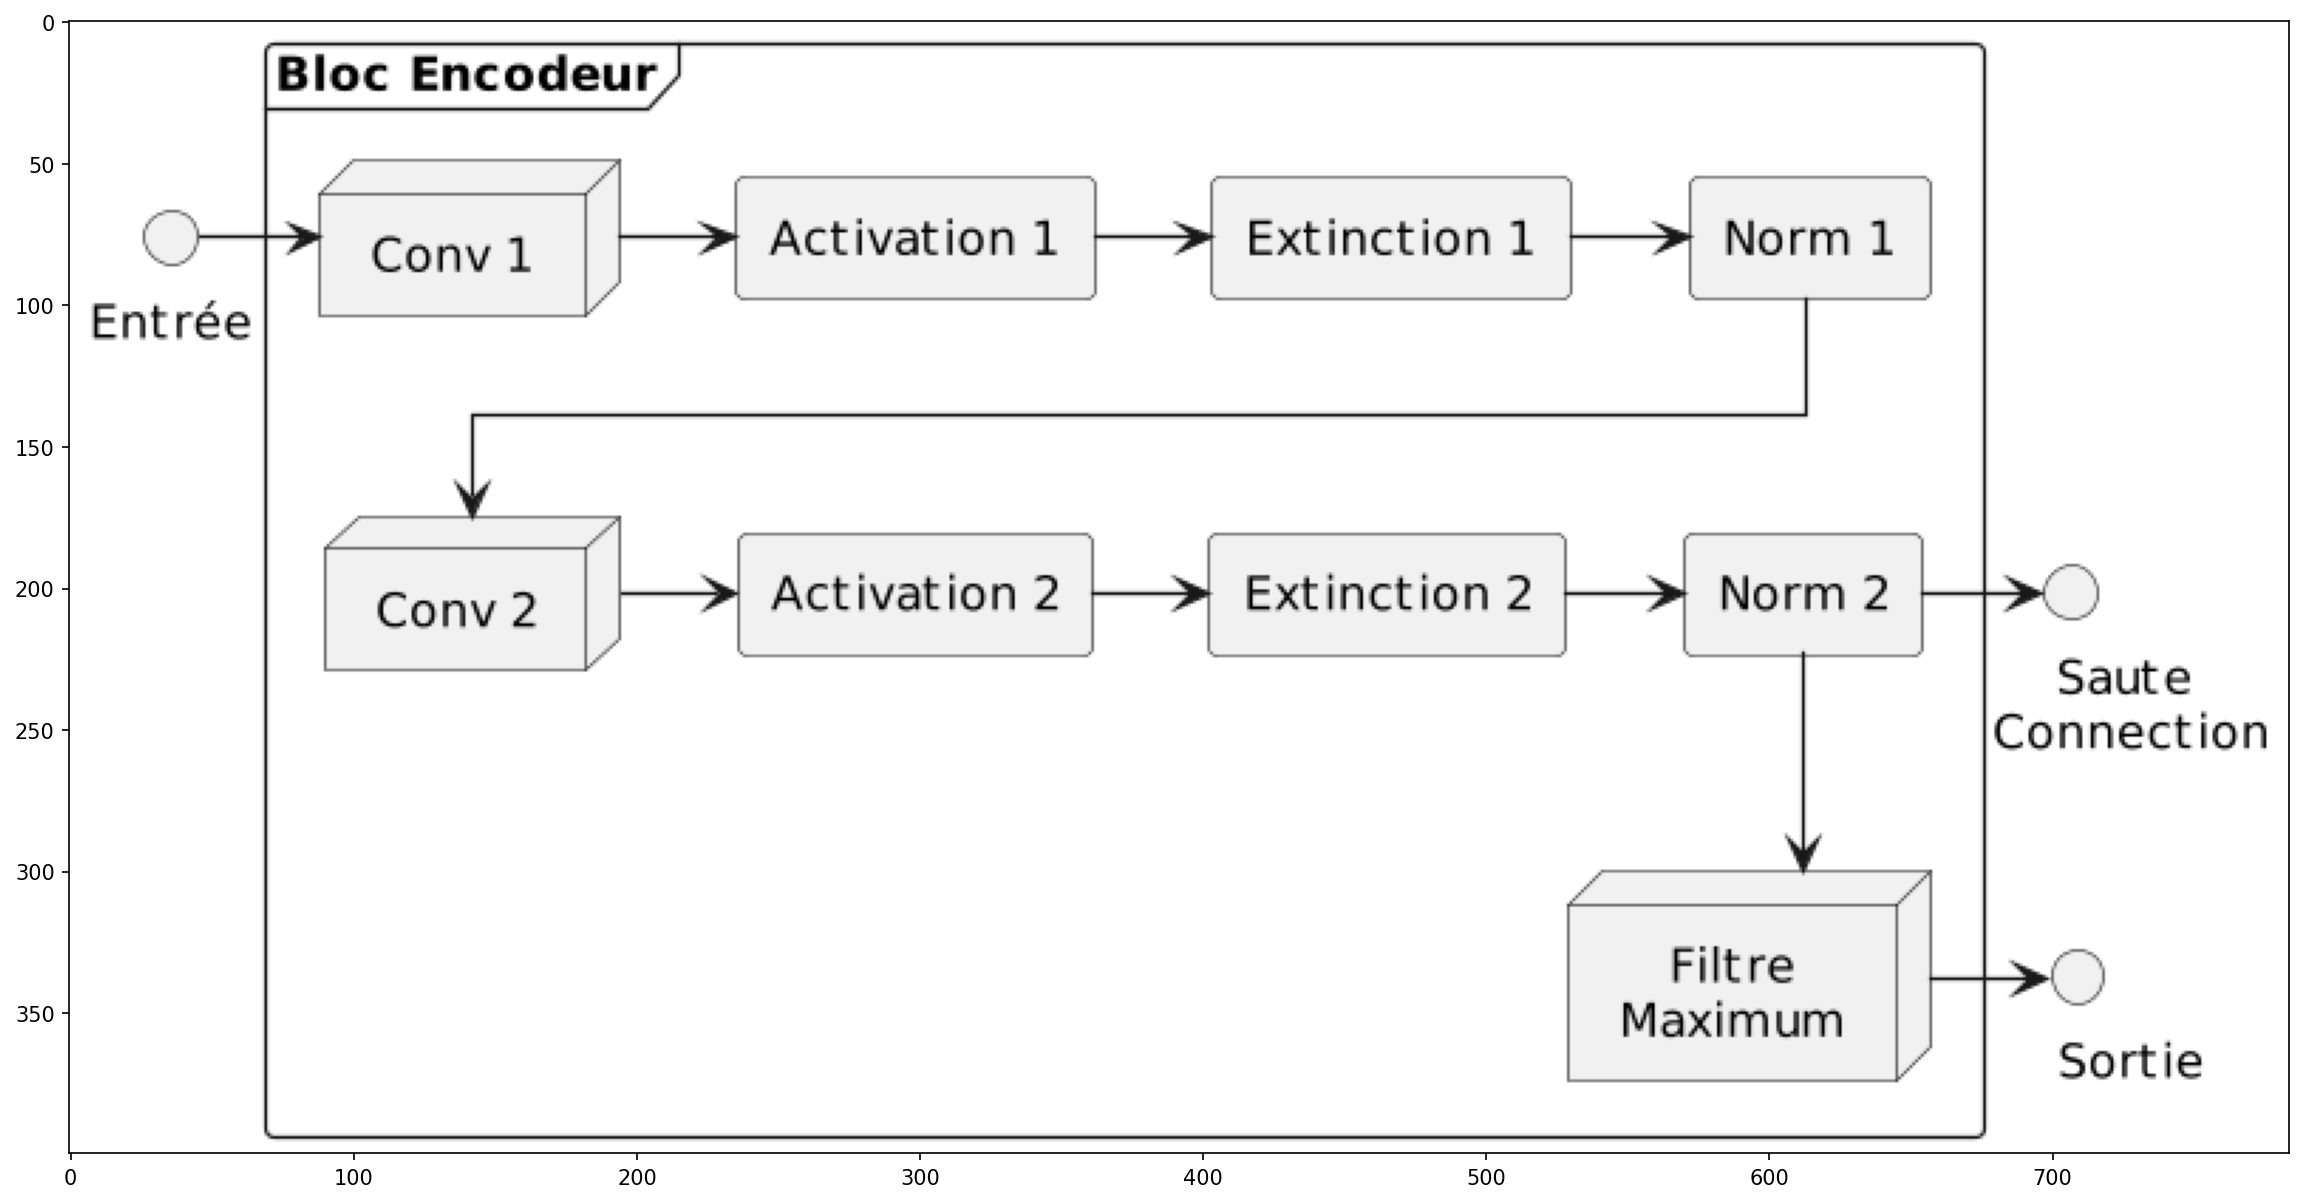

Saved graph at ..\data/output/graph\enc_block.png
Saved graph at ..\data/output/graph\enc_block.svg


In [13]:
# Encoder Block
filename = os.path.join(output_folder, "enc_block")
content = """
@startuml
scale 1024 width
scale 400 height

' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface Entrée
frame "Bloc Encodeur" {
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Norm 1"
    rectangle "Extinction 1"
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Norm 2"
    rectangle "Extinction 2"
    node      "Filtre\\nMaximum"
}
interface "        Saute\\n         Connection" as skip
interface "        Sortie" as out

' links
Entrée             -r-> "Conv 1"
"Conv 1"           -r-> "Activation 1"
"Activation 1"     -r-> "Extinction 1"
"Extinction 1"     -r-> "Norm 1"
"Norm 1"            --> "Conv 2"
"Conv 2"           -r-> "Activation 2"
"Activation 2"     -r-> "Extinction 2"
"Extinction 2"     -r-> "Norm 2"
"Norm 2"            --> "Filtre\\nMaximum"
"Norm 2"           -r-> skip
"Filtre\\nMaximum" -r-> out

@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)

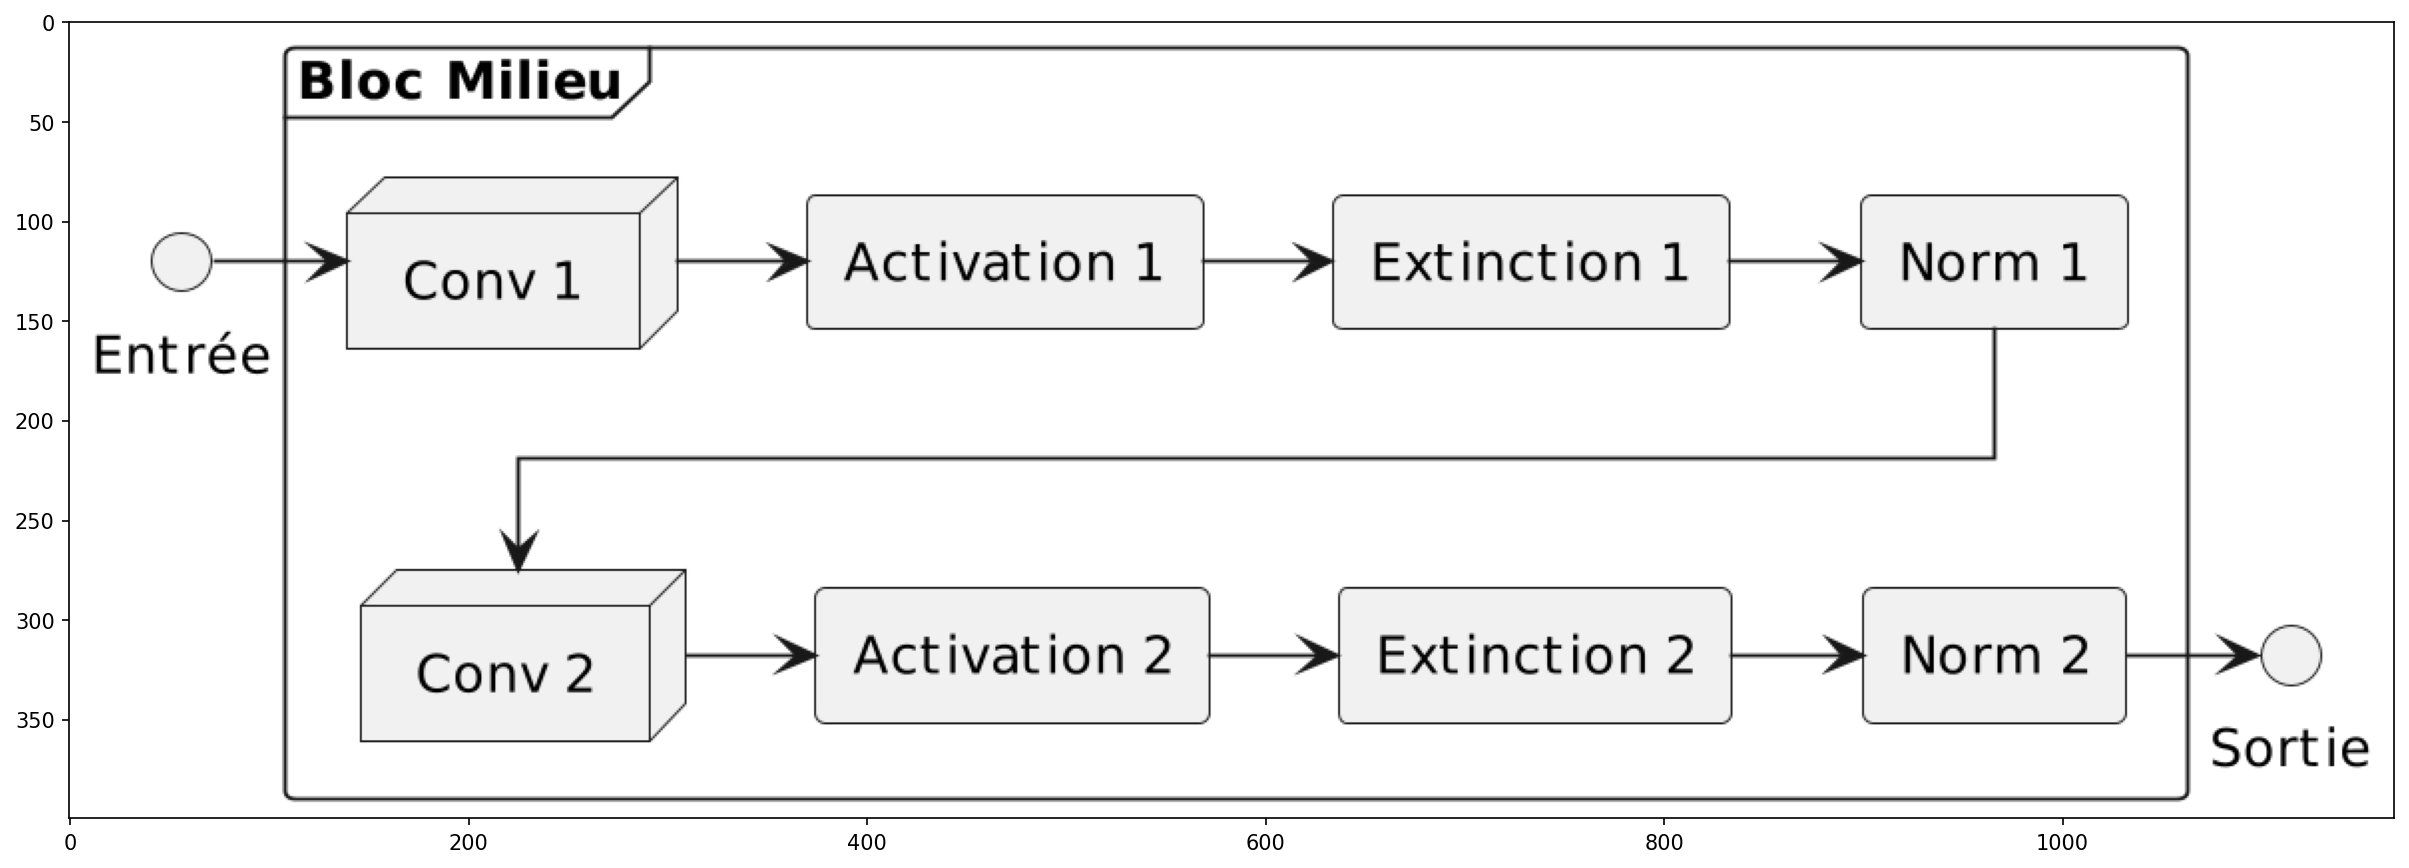

Saved graph at ..\data/output/graph\mid_block.png
Saved graph at ..\data/output/graph\mid_block.svg


In [10]:
# Middle Block
filename = os.path.join(output_folder, "mid_block")
content = """
@startuml
scale 1024 width
scale 400 height

' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface Entrée
frame "Bloc Milieu" {
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Norm 1"
    rectangle "Extinction 1"
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Norm 2"
    rectangle "Extinction 2"
}
interface "Sortie"

' links
Entrée           -r-> "Conv 1"
"Conv 1"         -r-> "Activation 1"
"Activation 1"   -r-> "Extinction 1"
"Extinction 1"   -r-> "Norm 1"
"Norm 1"          -->  "Conv 2"
"Conv 2"         -r-> "Activation 2"
"Activation 2"   -r-> "Extinction 2"
"Extinction 2"   -r-> "Norm 2"
"Norm 2"   -r-> "Sortie"

@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)

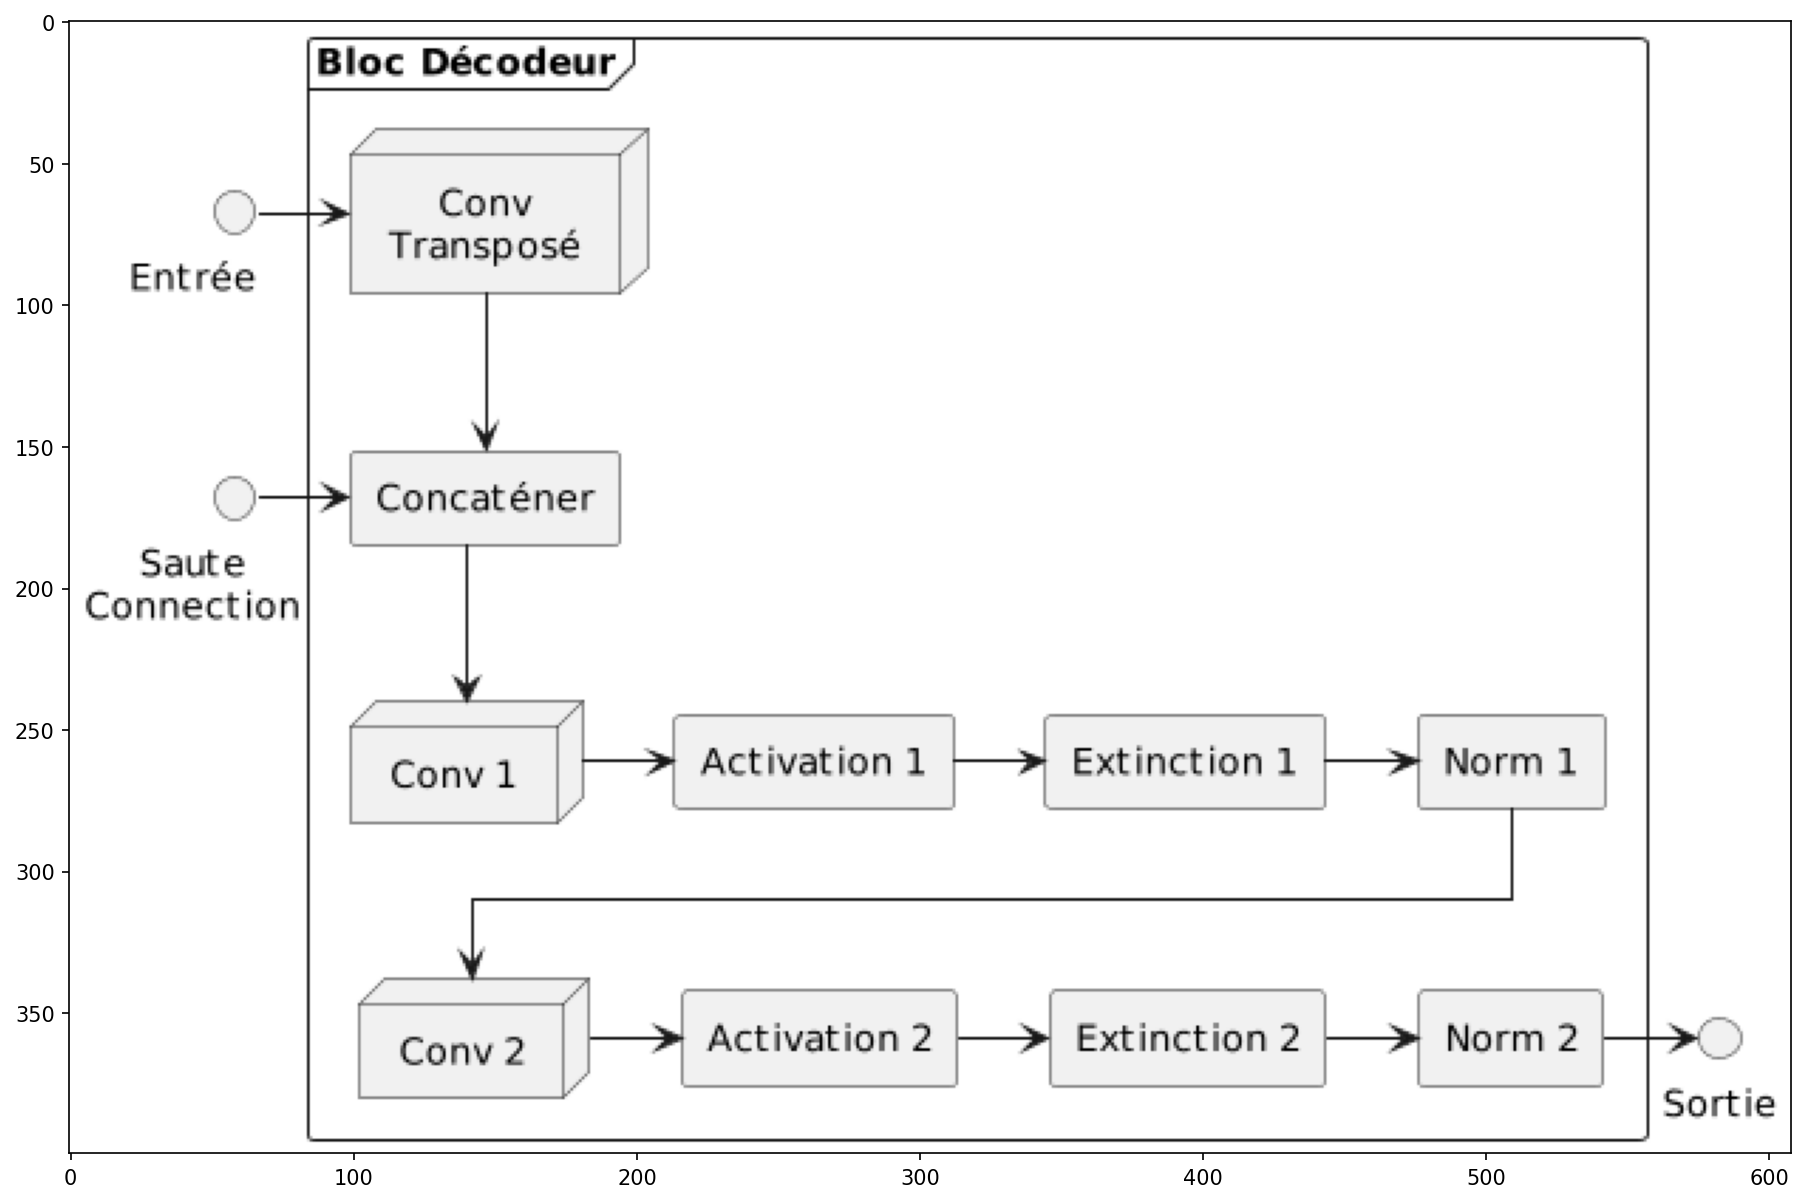

Saved graph at ..\data/output/graph\dec_block.png
Saved graph at ..\data/output/graph\dec_block.svg


In [18]:
# Decoder Block
filename = os.path.join(output_folder, "dec_block")
content = """
@startuml
scale 1024 width
scale 400 height

' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface "Saute        \\nConnection        " as skip
interface "Entrée        " as inp
frame "Bloc Décodeur" {
    node      "Conv\\nTransposé" as trans
    rectangle "Concaténer" as concat
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Norm 1"
    rectangle "Extinction 1" as drop1
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Norm 2"
    rectangle "Extinction 2" as drop2
}
interface "Sortie" as out

' links
inp                -r->         trans
inp                -d[hidden]-> skip
trans              -d->         concat
skip               -r->         concat
concat             -d->         "Conv 1"
"Conv 1"           -r->         "Activation 1"
"Activation 1"     -r->         drop1
drop1              -r->         "Norm 1"
"Norm 1"            -->         "Conv 2"
"Conv 2"           -r->         "Activation 2"
"Activation 2"     -r->         drop2
drop2              -r->         "Norm 2"
"Norm 2"           -r->         out

@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)

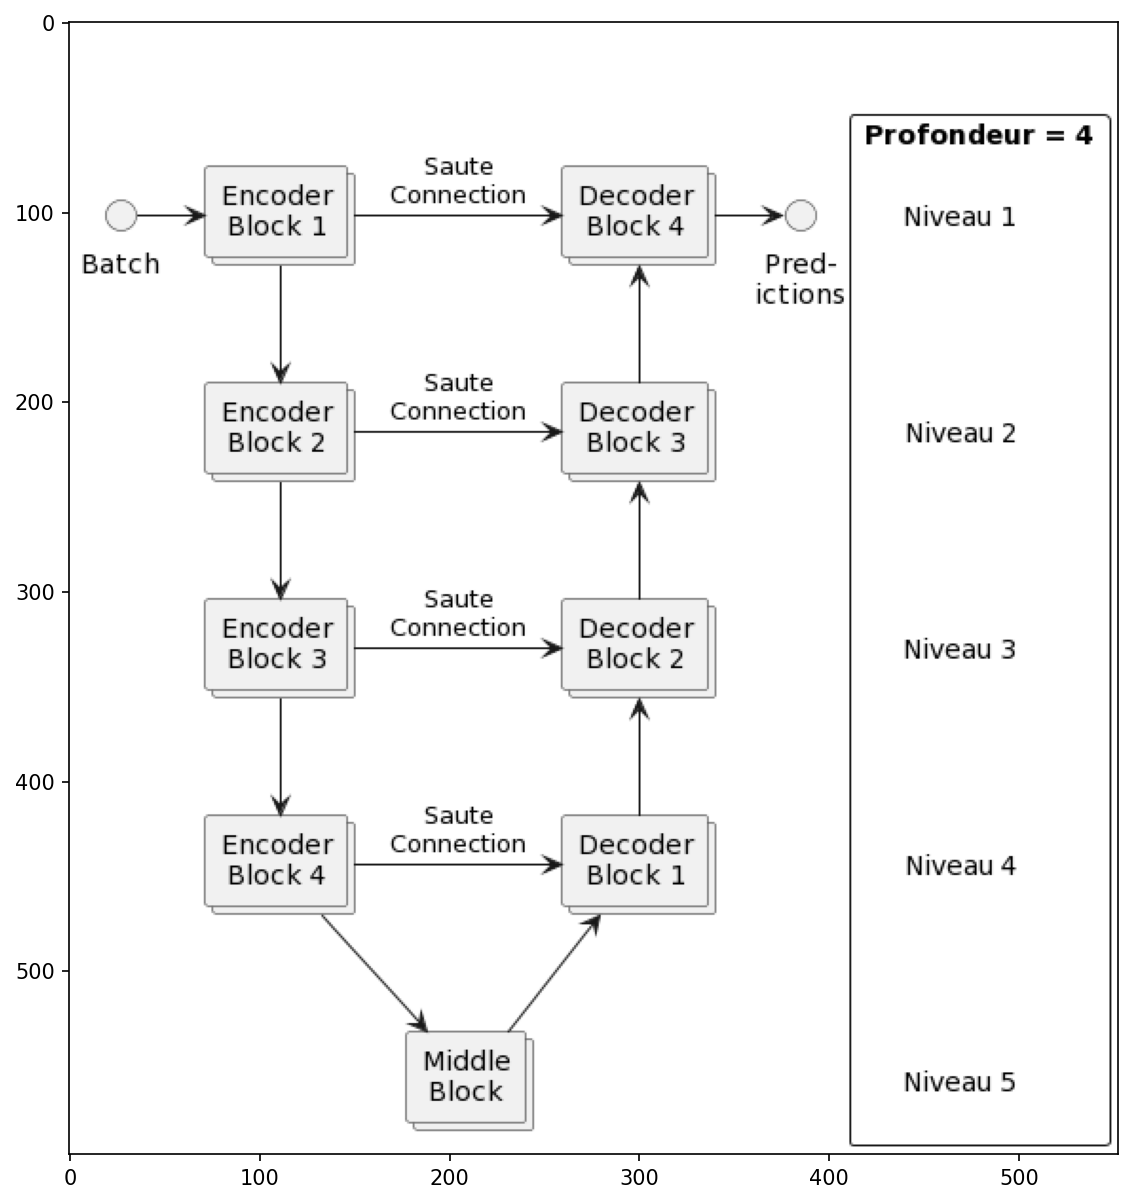

Saved graph at ..\data/output/graph\unet_arch.png
Saved graph at ..\data/output/graph\unet_arch.svg


: 

In [24]:
# Overall Architecture
filename = os.path.join(output_folder, "unet_arch")
content = """
@startuml
'scale 1024 width
'scale 400 height

' for straight lines
' center text
skinparam defaultTextAlignment center

' components
interface  "Batch"
collections "Encoder\\nBlock 1" as enc1
collections "Encoder\\nBlock 2" as enc2
collections "Encoder\\nBlock 3" as enc3
collections "Encoder\\nBlock 4" as enc4
collections "Middle\\nBlock" as mid
collections "Decoder\\nBlock 1" as dec1
collections "Decoder\\nBlock 2" as dec2
collections "Decoder\\nBlock 3" as dec3
collections "Decoder\\nBlock 4" as dec4
interface   "Pred-\\nictions" as pred
interface   "Dummy1" as d1
interface   "Dummy2" as d2
interface   "Dummy3" as d3
interface   "Dummy3" as d4
interface   "Dummy3" as d5
rectangle "Profondeur = 4" {
    label       "Niveau 1" as lv1
    label       "Niveau 2" as lv2
    label       "Niveau 3" as lv3
    label       "Niveau 4" as lv4
    label       "Niveau 5" as lv5
}

' links
"Batch" -r-> enc1
enc1 -d-> enc2
enc2 -d-> enc3
enc3 -d-> enc4

enc1 -r-> dec4 : "Saute\\nConnection"
enc2 -r-> dec3 : "Saute\\nConnection"
enc3 -r-> dec2 : "Saute\\nConnection"
enc4 -r-> dec1 : "Saute\\nConnection"

enc4 -d-> d4
d4   -r-> mid
mid  -r-> d5
d5   -u-> dec1

enc4 -d-> mid
mid  -u-> dec1

dec1 -u-> dec2
dec2 -u-> dec3
dec3 -u-> dec4

dec1 -r[hidden]-> d1
dec2 -r[hidden]-> d2
dec3 -r[hidden]-> d3
dec4 -r-> pred

lv1       -d[hidden]-> lv2
lv2       -d[hidden]-> lv3
lv3       -d[hidden]-> lv4
lv4       -d[hidden]-> lv5

lv1 -l[hidden]-> "Batch"
lv1 -l[hidden]-> enc1
lv2 -l[hidden]-> enc2
lv3 -l[hidden]-> enc3

hide d1
hide d2
hide d3
hide d4
hide d5
@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)

# UNet optimization tests

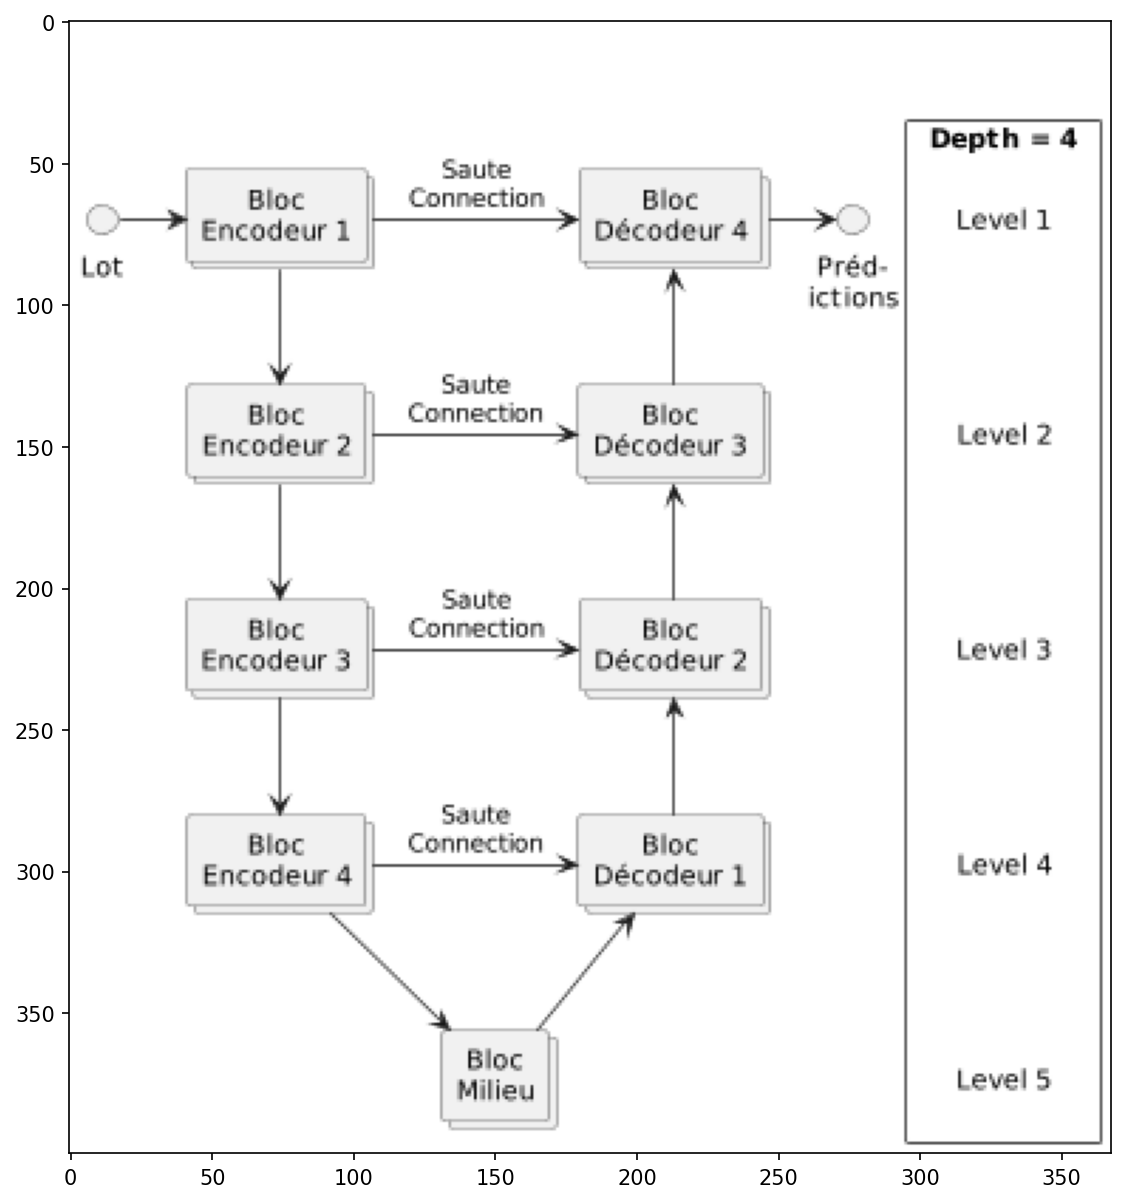

Saved graph at ..\data/output/graph\unet_arch.png
Saved graph at ..\data/output/graph\unet_arch.svg


In [8]:
# Overall Architecture
filename = os.path.join(output_folder, "unet_arch")
content = """
@startuml
scale 1024 width
scale 400 height

' for straight lines
' center text
skinparam defaultTextAlignment center

' components
interface  "Lot"
collections "Bloc\\nEncodeur 1" as enc1
collections "Bloc\\nEncodeur 2" as enc2
collections "Bloc\\nEncodeur 3" as enc3
collections "Bloc\\nEncodeur 4" as enc4
collections "Bloc\\nMilieu" as mid
collections "Bloc\\nDécodeur 1" as dec1
collections "Bloc\\nDécodeur 2" as dec2
collections "Bloc\\nDécodeur 3" as dec3
collections "Bloc\\nDécodeur 4" as dec4
interface   "Préd-\\nictions" as pred
interface   "Dummy1" as d1
interface   "Dummy2" as d2
interface   "Dummy3" as d3
interface   "Dummy3" as d4
interface   "Dummy3" as d5
rectangle "Depth = 4" {
    label       "Level 1"
    label       "Level 2"
    label       "Level 3"
    label       "Level 4"
    label       "Level 5"
}

' links
"Lot" -r-> enc1
enc1 -d-> enc2
enc2 -d-> enc3
enc3 -d-> enc4

enc1 -r-> dec4 : "Saute\\nConnection"
enc2 -r-> dec3 : "Saute\\nConnection"
enc3 -r-> dec2 : "Saute\\nConnection"
enc4 -r-> dec1 : "Saute\\nConnection"

enc4 -d-> d4
d4   -r-> mid
mid  -r-> d5
d5   -u-> dec1

enc4 -d-> mid
mid  -u-> dec1

dec1 -u-> dec2
dec2 -u-> dec3
dec3 -u-> dec4

dec1 -r[hidden]-> d1
dec2 -r[hidden]-> d2
dec3 -r[hidden]-> d3
dec4 -r-> pred

"Level 1"           -d[hidden]-> "Level 2"
"Level 2"           -d[hidden]-> "Level 3"
"Level 3"           -d[hidden]-> "Level 4"
"Level 4"           -d[hidden]-> "Level 5"

"Level 1" -l[hidden]-> "Lot"
"Level 1" -l[hidden]-> enc1
"Level 2" -l[hidden]-> enc2
"Level 3" -l[hidden]-> enc3

hide d1
hide d2
hide d3
hide d4
hide d5
@enduml
"""
render_graph(content)
save_png_graph(filename, content)
save_svg_graph(filename, content)